# data loading

In [1]:
#data collected from Road traffic statistics: https://roadtraffic.dft.gov.uk/downloads
#file contains data for number of vehicles that travel past the count point (in both directions) on an average day of the year.
import pandas as pd

df = pd.read_csv('dft_traffic_counts_aadf.csv')
df.head()





,Count_point_id,Year,Region_id,Region_name,Region_ons_code,Local_authority_id,Local_authority_name,Local_authority_code,Road_name,Road_category,...,Buses_and_coaches,LGVs,HGVs_2_rigid_axle,HGVs_3_rigid_axle,HGVs_4_or_more_rigid_axle,HGVs_3_or_4_articulated_axle,HGVs_5_articulated_axle,HGVs_6_articulated_axle,All_HGVs,All_motor_vehicles
0,6750,2014,6,London,E12000007,96,Islington,E09000019,A201,PA,...,787,1728,204,74,132,15,6,18,449,11916
1,8352,2014,6,London,E12000007,104,Lewisham,E09000023,A2,PA,...,430,1415,258,36,58,6,11,22,390,9426
2,6807,2014,6,London,E12000007,178,Kingston upon Thames,E09000021,A240,PA,...,175,1589,251,35,13,2,4,19,325,12951
3,16544,2014,5,North West,E12000002,85,Manchester,E08000003,A57,PA,...,911,1931,239,53,105,25,107,47,576,16107
4,27765,2014,6,London,E12000007,57,Barnet,E09000003,A5109,PA,...,302,1651,246,12,12,0,1,1,273,19276


# EDA-analysis

In [2]:
# looking at the columns we will work with
df.columns

Index(['Count_point_id', 'Year', 'Region_id', 'Region_name', 'Region_ons_code',
       'Local_authority_id', 'Local_authority_name', 'Local_authority_code',
       'Road_name', 'Road_category', 'Road_type', 'Start_junction_road_name',
       'End_junction_road_name', 'Easting', 'Northing', 'Latitude',
       'Longitude', 'Link_length_km', 'Link_length_miles', 'Estimation_method',
       'Estimation_method_detailed', 'Pedal_cycles',
       'Two_wheeled_motor_vehicles', 'Cars_and_taxis', 'Buses_and_coaches',
       'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
       'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
       'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'All_HGVs',
       'All_motor_vehicles'],
      dtype='object')

In [3]:
#checking data quality in regards to null values
df.isnull().sum()

Count_point_id                       0
Year                                 0
Region_id                            0
Region_name                          0
Region_ons_code                      0
Local_authority_id                   0
Local_authority_name                 0
Local_authority_code                 0
Road_name                            0
Road_category                        0
Road_type                            0
Start_junction_road_name        121975
End_junction_road_name          121964
Easting                              0
Northing                             0
Latitude                             0
Longitude                            0
Link_length_km                  121499
Link_length_miles               121499
Estimation_method                    0
Estimation_method_detailed           0
Pedal_cycles                         0
Two_wheeled_motor_vehicles           0
Cars_and_taxis                       0
Buses_and_coaches                    0
LGVs                     

Text(0.5, 1.0, 'UK daily traffic average (mileage)')

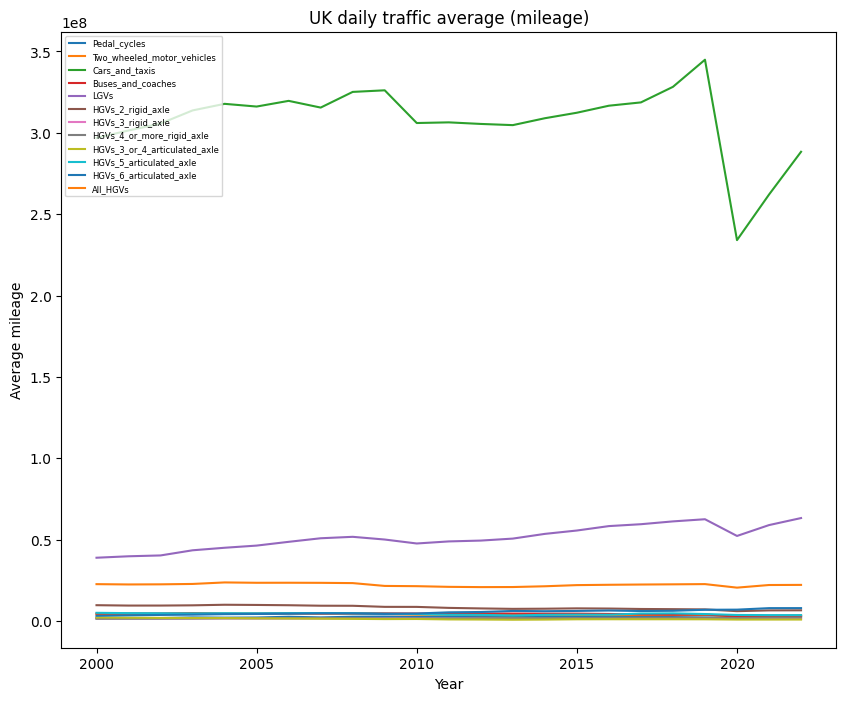

In [4]:
#list of vehicle types in the data

veh_lst = ['Pedal_cycles',
       'Two_wheeled_motor_vehicles', 'Cars_and_taxis', 'Buses_and_coaches',
       'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
       'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
       'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'All_HGVs']
#look at the average mileage of a road junction in the view of different type of vehicles
import matplotlib.pyplot as plt
veh_df = df.groupby('Year')[veh_lst].sum()

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(veh_df, label = veh_lst)
ax.legend(loc = 'upper left', prop={'size': 6})
plt.xlabel('Year')
plt.ylabel('Average mileage')
plt.title('UK daily traffic average (mileage)')



<Axes: title={'center': 'All motor vehicles average daily traffic (mileage)'}, xlabel='Year'>

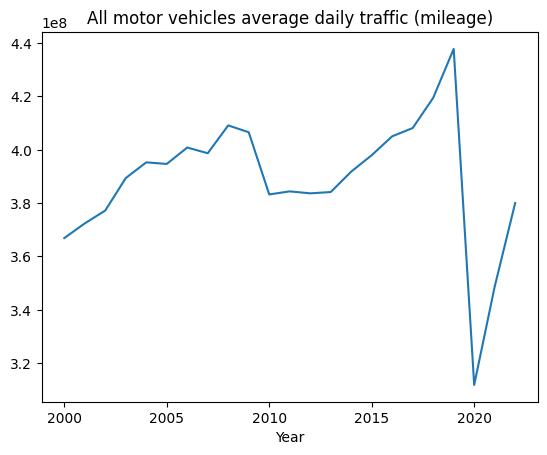

In [5]:
# a view of all motor vehicle average mileage in the past years
df_all = df.groupby('Year')['All_motor_vehicles'].sum()
df_all.plot(title='All motor vehicles average daily traffic (mileage)')

In [6]:
# Now we want to look at spacial distribution by local authority code of the UK traffic in the past year
count = df.groupby(['Year', 'Local_authority_code'])['All_motor_vehicles'].sum().reset_index()
count_2022 = count[count['Year'] == 2022]
count_2022.sort_values(by='All_motor_vehicles', ascending=False)

,Year,Local_authority_code,All_motor_vehicles
4654,2022,E10000016,11013152
4652,2022,E10000014,9520552
4665,2022,E10000030,9083107
4653,2022,E10000015,8950306
4650,2022,E10000012,7956841
...,...,...,...
4669,2022,S12000005,162143
4683,2022,S12000027,112349
4681,2022,S12000023,74064
4674,2022,S12000013,54441


In [7]:
#importing wards data to geopandas for plotting
#importing postcode data to map wards to postcodes
#& (map['LONG'] > -3.4) & (map['LONG'] < 1.7)
import geopandas as gpd
map = gpd.read_file('Wards_December_2023_Boundaries_UK_BFC_9190024445622031540/WD_DEC_2023_UK_BFC.shp')
map = map[(map['LAT'] < 55.8)]
LAD = pd.read_csv("Middle_Layer_Super_Output_Area_(2021)_to_Ward_to_LAD_(May_2023)_Lookup_in_England_and_Wales.csv")

# Map the wards with the local authority code
merge = pd.merge(map, LAD[['WD23CD', 'LAD23CD']], how='left', on='WD23CD')
merge.drop_duplicates(subset='WD23CD', keep='first', inplace=True)

# now we can merge the traffic count to the wards on the lac
merge_2 = pd.merge(merge, count_2022[['Local_authority_code', 'All_motor_vehicles']], how='left', left_on='LAD23CD',right_on='Local_authority_code')
merge_2.drop_duplicates(subset='WD23CD', keep='first', inplace=True)
merge_2['All_motor_vehicles'] = merge_2['All_motor_vehicles'].fillna(0)

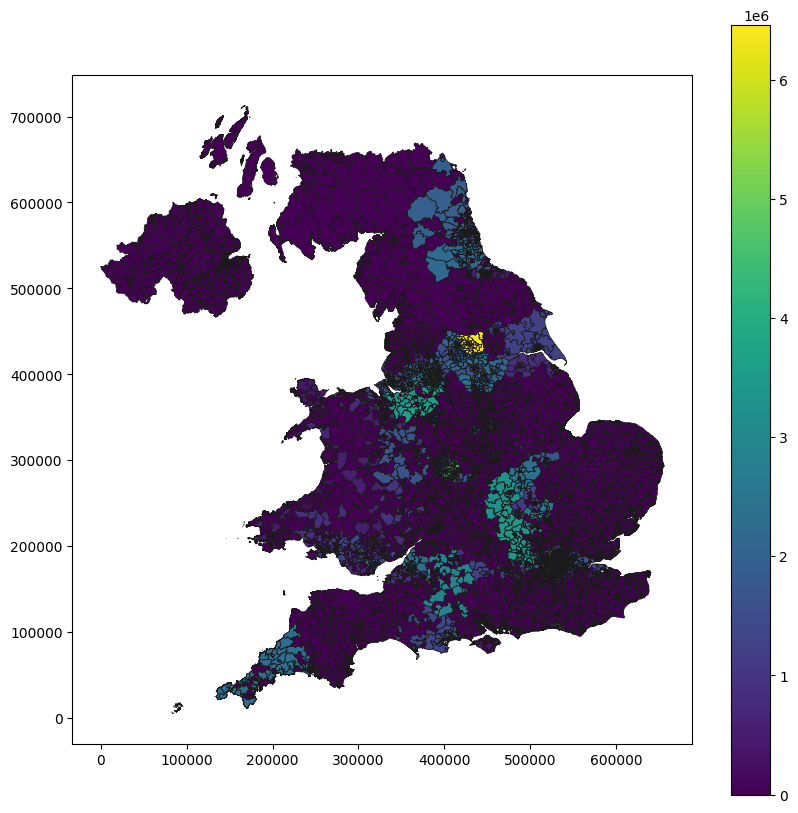

In [8]:
# Create a spacial view
fig, ax = plt.subplots(figsize=(10, 10))
merge_2.plot(ax=ax, column='All_motor_vehicles', cmap='viridis', linewidth=0.5, edgecolor='0.1', legend=True)

# Show the plot

plt.show()

# Prophet forecasting

In [9]:
# Suppose we would like to predict the future traffic for each region in the next 10 years.
# In here we will use the facebook prophet model as the modelling approach, as in the above eda process we can see the impact of covid-19 has caused a unpresendented impact to the trend.
# On this note, Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects, which make it a good candidate to deal with seasonal data
# and also its ability to handles outliers well.

In [10]:
import pandas as pd
def data_read(path: str) -> pd.DataFrame:

    df = pd.read_csv(path)

    return df


def add_future_frame(model, period: int) -> pd.DataFrame:

    df = model.make_future_dataframe(periods=period)

    return df

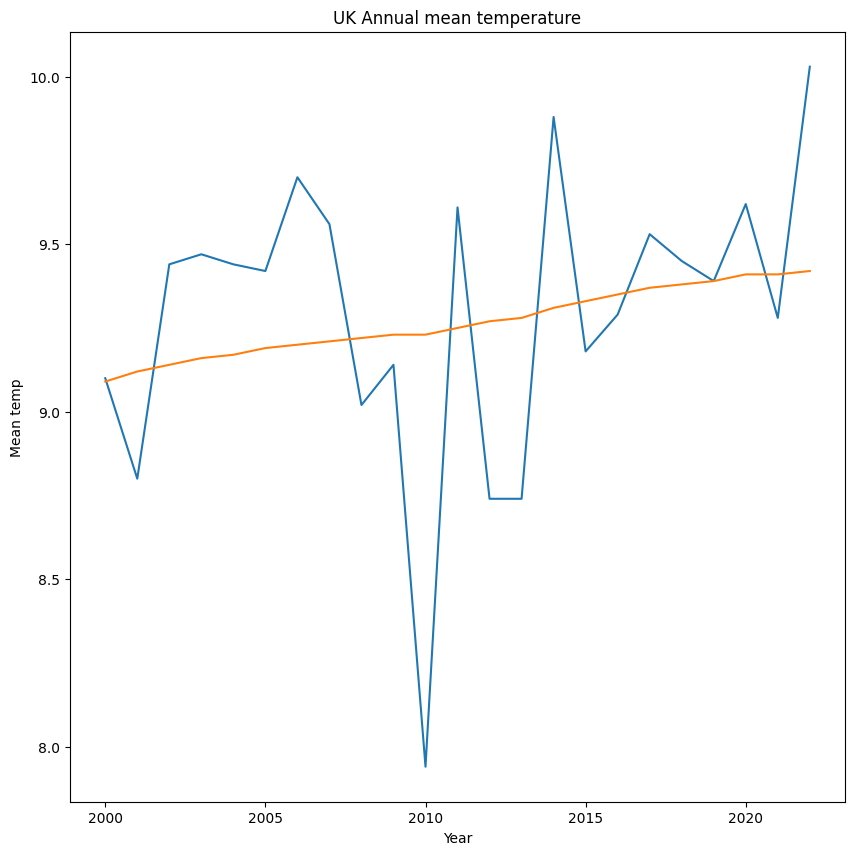

In [41]:
import matplotlib.pyplot as plt
# importing historic data; change column to ds and y
df_traffic = data_read('dft_traffic_counts_aadf.csv')
df_traffic = df_traffic[['Year', 'Region_id', 'All_motor_vehicles']].rename(columns={'Year' : 'ds', 'All_motor_vehicles': 'y'})
df_traffic = df_traffic.groupby(['ds', 'Region_id'])['y'].sum()
df_traffic = df_traffic.reset_index()
# we can add regressor to the linear part of the prophet model, which aims to improve the forecasting accuracy.
# to do that we need the weather data of UK since 2000
df_weather = data_read('chart-data.csv')
df_weather.set_index('date', inplace=True)
# lets visualize the mean tempearture change over the years and its trend since 2000
# df_weather.index = pd.to_datetime(df_weather.index, format='%Y%m%d').year
fig, ax = plt.subplots(figsize=(10,10)) 

ax.plot(df_weather[df_weather.index >= 2000]['Annual mean temperature'], label='Annual mean temperature')
ax.plot(df_weather[df_weather.index >= 2000]['Annual mean temperature (trend)'], label='Annual mean temperature (trend)')
plt.ylabel('Mean temp')
plt.xlabel('Year')
plt.title('UK Annual mean temperature')
plt.show()

In [16]:
# To include covid-19 as a holiday regressor to include in the model.
lockdowns = pd.DataFrame({
  'holiday': 'lockdown',
    # dates of national lockdown UK
  'ds': ['2020-03-26', '2020-11-05', '2021-01-06'],
  'lower_window': 0,
  'upper_window': ['2020-07-04', '2020-12-02', '2021-03-08']
})

In [25]:
from prophet import Prophet

# Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.
m = Prophet()
m.fit(df_traffic)

21:00:50 - cmdstanpy - INFO - Chain [1] start processing
21:01:56 - cmdstanpy - INFO - Chain [1] done processing
